In [2]:
%matplotlib inline


# Visualizations with Display Objects

This Notebooks is adapted from [*Visualizations with Display Objects*](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py).

In this example, we will construct display objects, `ConfusionMatrixDisplay`, `RocCurveDisplay`, and
`PrecisionRecallDisplay` directly from their respective metrics. This is an alternative to using their corresponding plot functions when a model's predictions are already computed or expensive to compute. Note that this is advanced usage, and in general we recommend using their respective plot functions.

## Load Data

For this example, we load a [blood transfusion service center data set from OpenML](https://www.openml.org/d/1464). This is a binary classification problem where the target is whether an individual donated blood.

In [3]:
import numpy as np
from sklearn.datasets import fetch_openml

X, y = fetch_openml(data_id=1464, return_X_y=True)
y = y.astype(np.int8)

### Data Samples

In [4]:
import pandas as pd

df = pd.DataFrame(X, columns=["V1", "V2", "V3", "V4"])
df.insert(4, "Class", y)
df.head()

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,2
1,0.0,13.0,3250.0,28.0,2
2,1.0,16.0,4000.0,35.0,2
3,2.0,20.0,5000.0,45.0,2
4,1.0,24.0,6000.0,77.0,1


V1 = months since last donation <br>
V2 = total number of donations <br>
V3 = total blood donated in cc <br>
V4 = months since first donation <br>
Class = donated in March 2007 (yes = 2, no = 1)

In [5]:
df.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [6]:
df.Class.value_counts()

1    570
2    178
Name: Class, dtype: int64

1 = did NOT donate blood in March 2007 <br>
2 = donated blood in March 2007

## Train Model

Split data into a train and test dataset and fit a logistic regression.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

clf = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        C=1.0,
        penalty="l2",
        multi_class="auto",
        random_state=0,
        class_weight=None,
        solver="lbfgs",
        max_iter=100,
        l1_ratio=None,
    ),
)
clf.fit(X_train, y_train)
print("Test accuracy: %f" % clf.score(X_test, y_test))

Test accuracy: 0.770053


## Predict Classes

Use the fitted model to make predictions using the test examples.

In [8]:
y_pred = clf.predict(X_test)

print("Predicted classes:\n%s\n" % pd.DataFrame(y_pred).value_counts())
print("Actual classes:\n%s" % pd.DataFrame(y_test).value_counts())

Predicted classes:
1    177
2     10
dtype: int64

Actual classes:
1    142
2     45
dtype: int64


## Create `ConfusionMatrixDisplay`

Compute the confustion matrix and plot it with `ConfusionMatrixDisplay`

Precision: 0.600000
Recall: 0.133333


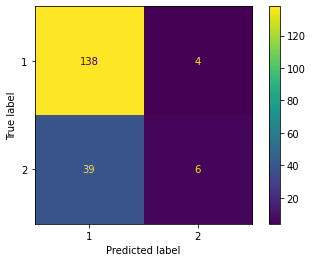

In [9]:
cm = metrics.confusion_matrix(y_test, y_pred)
_ = metrics.ConfusionMatrixDisplay(cm, display_labels=[1,2]).plot()

print("Precision: %f" % metrics.precision_score(y_test, y_pred, pos_label=2))
print("Recall: %f" % metrics.recall_score(y_test, y_pred, pos_label=2))

## Create `RocCurveDisplay`

The roc curve requires either the probabilities or the non-thresholded decision values from the estimator. Since the logistic regression provides a decision function, we will use it to plot the roc curve.

Area under the curve: 0.778013


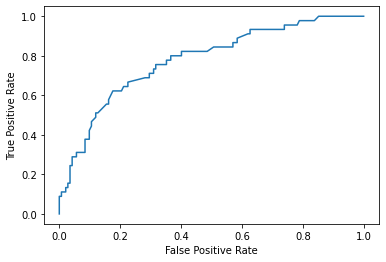

In [62]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_score, pos_label=2)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
print("Area under the curve: %f" % metrics.auc(fpr, tpr))

## Create `PrecisionRecallDisplay`

Similarly, the precision recall curve can be plotted using `y_score` from the prevision sections.

Average precision: 0.618756


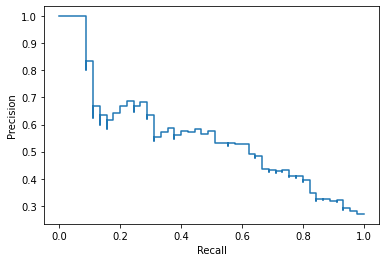

In [63]:
prec, recall, _ = metrics.precision_recall_curve(y_test, y_score, pos_label=2)
pr_display = metrics.PrecisionRecallDisplay(prec, recall).plot()
print("Average precision: %f" % metrics.average_precision_score(y_test, y_score))